In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

import copy
import os.path as osp

import mmcv
import numpy as np
from mmcv.utils import build_from_cfg
from PIL import Image

from mmseg.datasets.builder import PIPELINES

%matplotlib inline

PATH_TO_IMAGE = "/home/n_stolyarov/HDD/Datasets/SberMerged/test/images/1.png"
PATH_TO_SEG = "//home/n_stolyarov/HDD/Datasets/SberMerged/test/Semantic_palette/1.png"
palette_6 = [[102, 255, 102], [51, 221, 255], [245, 147, 49], [184, 61, 245], [250, 50, 83], [0, 0, 0]]
palette_7 = [[255,255,255],[102, 255, 102], [245, 147, 49], [51, 221, 255], [184, 61, 245], [250, 50, 83], [0, 0, 0]]
palette_new = [[102, 255, 102], [51, 221, 255], [245, 147, 49], [184, 61, 245], [250, 50, 83], [0, 0, 0],[255, 255, 255]]


In [15]:
img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='DistortPinholeToFisheye', transform_probability = 1,  input_shape = (720,1280), output_shape = (1200,1920), num_classes=6,
                                        focal_distances = [150], maps_probability = None, palette=True),
    #dict(type='RandomFisheyeShift', prob=0.5, max_dx=200, max_dy=200, num_classes=6, palette=True),
    #dict(type='RandomFisheyeCrop', prob=0.5, num_classes=6, max_dx=100, max_dy=100,
    #     part_x_range=(0.8, 1.4), part_y_range=(0.8, 1.4), palette=True)
    #dict(type='RandomFlip', prob=0.5),
    #dict(type='PhotoMetricDistortion'),
    #dict(type='Normalize', **img_norm_cfg),
    #dict(type='Resize', img_scale=(512, 512), keep_ratio=True, ratio_range=(1, 1.5))
]

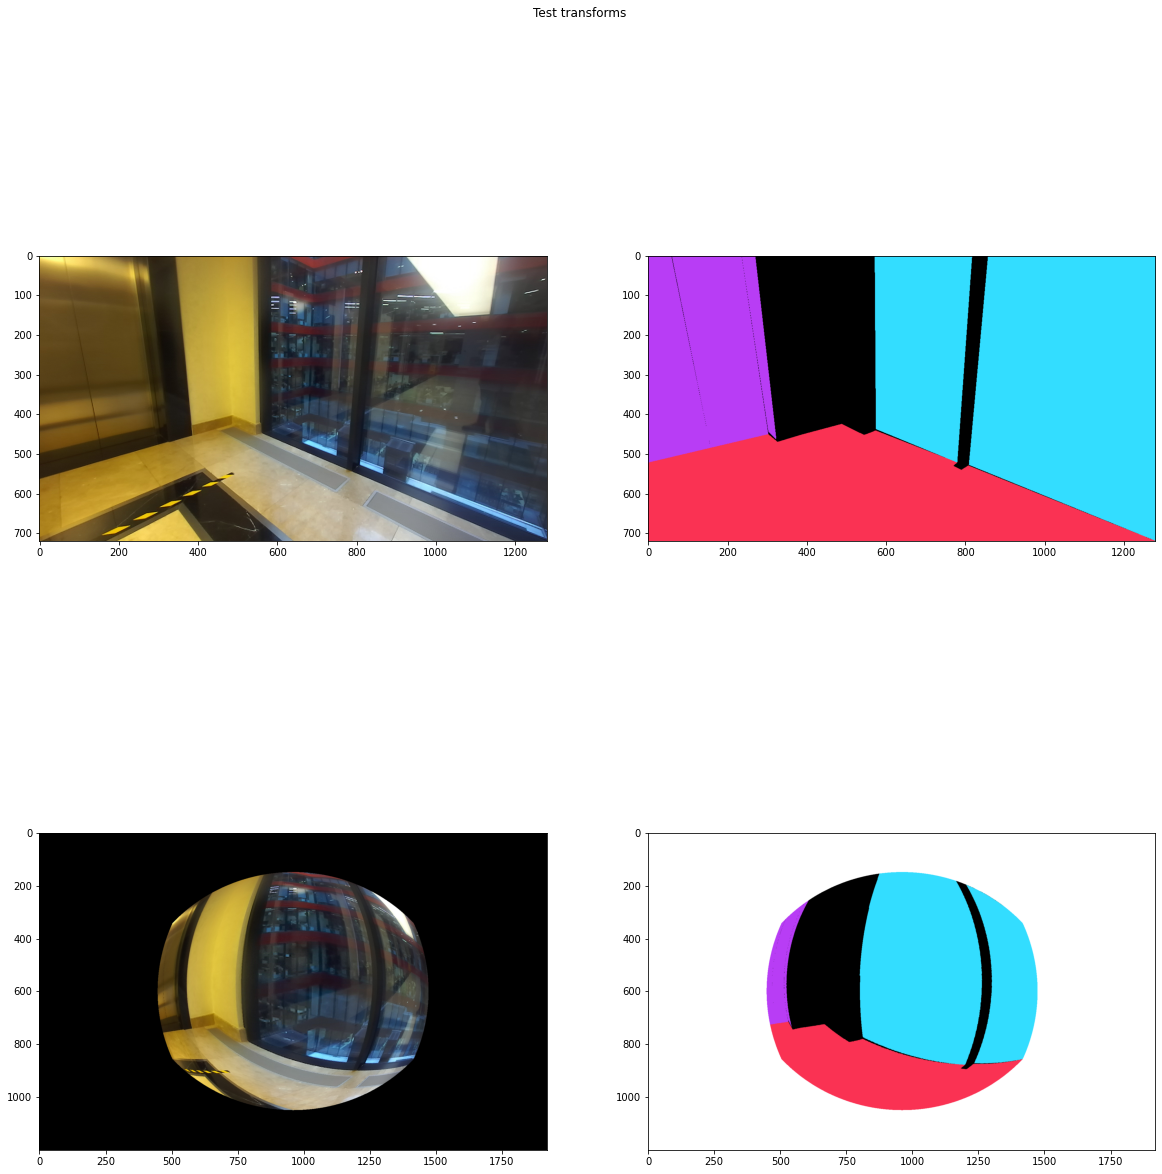

In [16]:
results = dict()
results['img_info'] = {
    'filename': PATH_TO_IMAGE
}
results['ann_info'] = {
    'seg_map': PATH_TO_SEG
}
results['seg_fields'] = []


orig_img_transforms = []
seg_img_transforms = []
for transform_dict in train_pipeline:
    transform = build_from_cfg(transform_dict, PIPELINES)
    results = transform(results)
    if 'img' in results and 'gt_semantic_seg' in results:
        orig_img_transforms.append(copy.deepcopy(results['img']))
        seg_img_transforms.append(copy.deepcopy(results['gt_semantic_seg']))
num_img = len(orig_img_transforms)
fig, axes = plt.subplots(num_img, 2)
fig.suptitle('Test transforms')
fig.set_size_inches(20, 20)
for i, (orig, seg) in enumerate(zip(orig_img_transforms, seg_img_transforms)):
    axes[i, 0].imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
    #print(seg[350:370,630:650])
    seg_color = np.zeros((*seg.shape,3),dtype=np.uint8)
    for id, color in enumerate(palette_new):
        seg_color[seg == id] = color
    axes[i, 1].imshow(seg_color)
plt.show()

In [31]:
test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='DistortPinholeToFisheye', transform_probability = 1,  input_shape = (720,1280), output_shape = (1200,1920), num_classes=6,
                                        focal_distances = [80], maps_probability = None, palette=True),
    dict(type='RandomFisheyeCrop', prob=1, num_classes=6, dy_range=(30,31),
         part_x_range=(1.29, 1.31), part_y_range=(0.89, 0.89), palette=True),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(512, 512),
        # img_ratios=[0.5, 0.75, 1.0, 1.25, 1.5, 1.75],
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip'),
            dict(type='Normalize', **img_norm_cfg),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img']),
        ])
]

In [12]:
results = dict()
results['img_info'] = {
    'filename': PATH_TO_IMAGE
}
results['ann_info'] = {
    'seg_map': PATH_TO_SEG
}
results['seg_fields'] = []

orig_img_transforms = []
seg_img_transforms = []
for transform_dict in test_pipeline:
    transform = build_from_cfg(transform_dict, PIPELINES)
    results = transform(results)
    if 'img' in results and 'gt_semantic_seg' in results:
    #print(results)
        orig_img_transforms.append(copy.deepcopy(results['img']))
        seg_img_transforms.append(copy.deepcopy(results['gt_semantic_seg']))
num_img = len(orig_img_transforms)
fig, axes = plt.subplots(num_img, 2)
fig.suptitle('Test transforms')
fig.set_size_inches(20, 20)
for i, (orig, seg) in enumerate(zip(orig_img_transforms, seg_img_transforms)):
    axes[i, 0].imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
    seg_color = np.zeros((*seg.shape,3),dtype=np.uint8)
    for id, color in enumerate(palette_new):
        seg_color[seg == id] = color
    axes[i, 1].imshow(seg_color)
plt.show()

NameError: name 'test_pipeline' is not defined